#Tutorial: Clasificador Lineal — Perceptrón

###1.1 Fundamentos de la técnica

El Perceptrón es el modelo más simple de una red neuronal artificial, propuesto por Frank Rosenblatt (1958).
Su objetivo es clasificar datos linealmente separables mediante una combinación lineal de las entradas y una función de activación.

**Características principales:**
- Es un **clasificador lineal supervisado**.
- Aprende ajustando pesos según el error cometido.
- Utiliza una **regla de aprendizaje basada en retroalimentación del error**.
- Solo funciona si los datos son **linealmente separables**.



###1.2 Modelo Matemático del Perceptrón

El **Perceptrón** combina las entradas mediante una suma ponderada y aplica una función de activación para determinar la clase.

Sea el vector de entrada:

$$\mathbf{x} = [x_1, x_2, ..., x_n]$$

y el vector de pesos:

$$\mathbf{w} = [w_1, w_2, ..., w_n]$$

El modelo calcula una salida neta (*net input*) como:

$$z = \mathbf{w} \cdot \mathbf{x} + b = \sum_{i=1}^{n} w_i x_i + b$$

donde $b$ es el **sesgo (bias)**.

La función de activación tipo escalón se define como:

$$y = f(z) = \begin{cases} 1, & \text{si } z \geq 0 \\ 0, & \text{si } z < 0 \end{cases}$$

La **regla de actualización de pesos** es:

$$\mathbf{w}_{t+1} = \mathbf{w}_t + \eta \, (y_{\text{real}} - y_{\text{pred}})\, \mathbf{x}$$

donde:
- $\eta$: tasa de aprendizaje,
- $y_{\text{real}}$: etiqueta real,
- $y_{\text{pred}}$: salida del modelo.

El entrenamiento termina cuando:
1. Todos los patrones se clasifican correctamente, o  
2. Se alcanza el número máximo de iteraciones.


###1.3 Descripción de la librería, clases, funciones (python) empleadas en programar el Perceptrón; en su sección respectiva

En esta práctica utilizaremos:

- **NumPy:** manejo de vectores y matrices numéricas.  
- **Matplotlib:** visualización de datos.  
- **scikit-learn:** implementación del Perceptrón y herramientas de machine learning.  

Las principales clases y funciones que usaremos son:
- **make_classification**: genera datos sintéticos.
- **train_test_split**: separa los datos en entrenamiento y prueba.
- **Perceptron**: modelo de clasificación lineal.
- **accuracy_score**: mide el desempeño del modelo.


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

###1.4. Pipeline del Perceptrón
A continuación, se implementan las etapas del proceso de aprendizaje supervisado.

####1.4.1 Feature Engineering
Creamos un conjunto de datos sintético con dos clases linealmente separables:


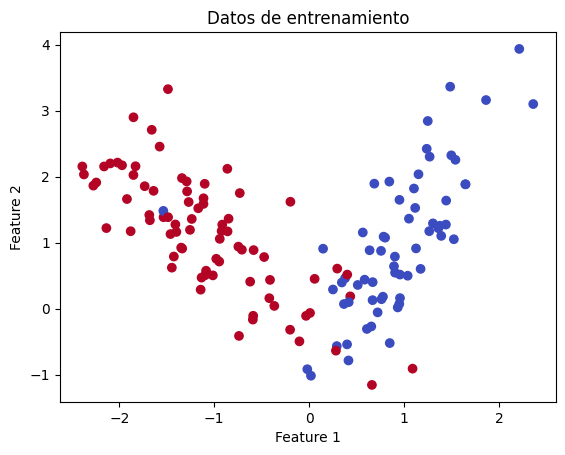

In [42]:
# Generar dataset sintético
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0,
    n_informative=2, n_clusters_per_class=1, random_state=None
)

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualización
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.title("Datos de entrenamiento")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

###1.4.2 Model Selection
Se elige un **clasificador lineal (Perceptrón)** porque:

- Los datos son aproximadamente **linealmente separables**.
- Es un modelo **simple, rápido y eficiente**.
- Permite entender los principios básicos de los clasificadores lineales.

####1.4.3 Model Training
Entrenamos el modelo:


In [43]:
# Crear y entrenar el modelo Perceptron
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

####1.4.4 Prediction
Creamos una función para probar predicciones, probamos el modelo con algunos ejemplos del conjunto de prueba:


In [44]:
def test_predictions(model, X, y):
    y_pred = model.predict(X)
    for i in range(5):
        print(f"Entrada: {X[i]} → Predicción: {y_pred[i]} (Real: {y[i]})")

test_predictions(model, X_test, y_test)

Entrada: [ 0.40651141 -0.77174847] → Predicción: 0 (Real: 1)
Entrada: [ 0.16218401 -0.86824344] → Predicción: 0 (Real: 0)
Entrada: [-0.66186391  1.24760913] → Predicción: 1 (Real: 1)
Entrada: [0.7700921  1.44133667] → Predicción: 0 (Real: 0)
Entrada: [0.46879659 0.4252136 ] → Predicción: 0 (Real: 0)


####1.4.5 Model Evaluation
Evaluamos el desempeño del modelo usando la métrica **Accuracy** y visualizamos la frontera de decisión.


Accuracy del modelo: 0.92


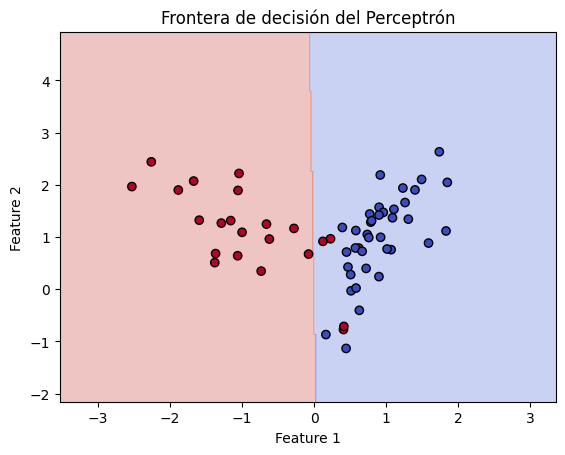

In [45]:
# Calcular accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {acc:.2f}")

# Visualizar frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("Frontera de decisión del Perceptrón")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()







Interpretación:
Un valor de Accuracy alto (por ejemplo > 0.9) indica que el Perceptrón logró separar correctamente la mayoría de los puntos de prueba.




###1.5 Referencias bibliográficas

Rosenblatt, F. (1958). The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain. Psychological Review.

Scikit-learn Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O’Reilly Media.

Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.